[[list([0, 'yellow']) list(['1', '2', '24', '25', '30'])]
 [list([1, 'yellow']) list(['0', '2', '23', '24'])]
 [list([2, 'yellow']) list(['0', '1', '3', '10', '13', '23', '30'])]
 [list([3, 'red']) list(['2', '4', '6', '10', '25', '30'])]
 [list([4, 'green']) list(['3', '5', '6', '25'])]
 [list([5, 'red']) list(['4', '6', '7'])]
 [list([6, 'yellow']) list(['3', '4', '5', '7', '8', '9', '10'])]
 [list([7, 'green']) list(['5', '6', '8'])]
 [list([8, 'blue']) list(['6', '7', '9'])]
 [list([9, 'blue']) list(['6', '8', '10', '11'])]
 [list([10, 'blue']) list(['2', '3', '6', '9', '11', '13'])]
 [list([11, 'green']) list(['9', '10', '12', '13'])]
 [list([12, 'blue']) list(['11', '13', '14'])]
 [list([13, 'green']) list(['2', '10', '11', '12', '14', '23'])]
 [list([14, 'green']) list(['12', '13', '15', '16', '17', '23'])]
 [list([15, 'yellow']) list(['14', '16', '23'])]
 [list([16, 'yellow']) list(['14', '15', '17', '18', '23'])]
 [list([17, 'green']) list(['14', '16', '18', '19'])]
 [list([18

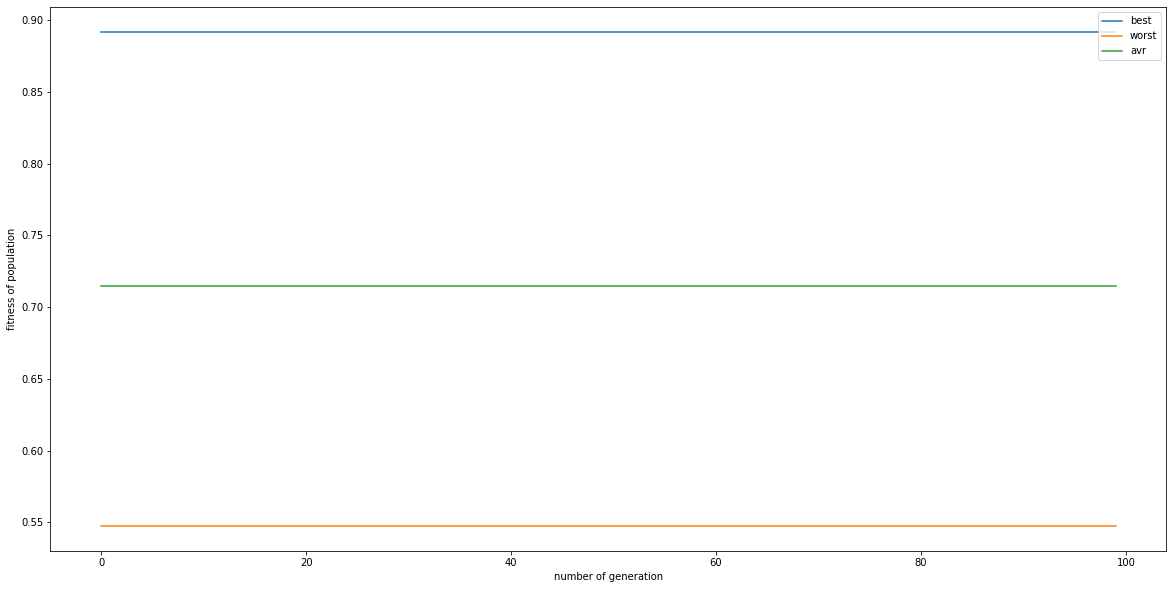

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# initilizing colors (can change for new problems)
colors = ["red","blue","yellow","green"]
# initilizing the adjacancy graph (can change)
nodes = [
    ["first_node",["second_node","third_node"]],
    ["second_node",["first_node","third_node","fourth_node"]],
    ["third_node",["first_node","second_node","fourth_node","fifth_node","sixth_node"]],
    ["fourth_node",["second_node","third_node","fifth_node"]],
    ["fifth_node",["third_node","fourth_node","sixth_node"]],
    ["sixth_node",["third_node","fifth_node"]]
]
#####
file = open("iran.txt",'r')
lines = file.readlines()
nodes = []
indx = 0
for line in lines:
    nodes.append([indx,line.replace("\n","").split(" ")])
    indx+=1
#####
# print(nodes[0])

def fitness(chromosome,nodes):
    fitness = 0
    edges = 0
    for member in chromosome:
        for neigbour in member[1]:
            edges+=1
            for i in range(len(chromosome)):
                if chromosome[i][0][0]==neigbour:
                    break
            if member[0][1] != chromosome[i][0][1]:
                fitness+=1
                
    return fitness/edges

def cross_over(x,y):
    temp = []
    split = len(x)//2
    for i in x[:split]:
        temp.append(i)
    for i in y[split:]:
        temp.append(i)
    return temp

def evolution(nodes,features,population_size,tornument_size,mutation_rate,number_generations):
    # first , randomly initilize population
    population = []
    for i in range(population_size):
        temp_generation = np.copy(nodes)
        for j in range(len(nodes)):
            r = np.random.randint(len(features))
            temp_generation[j][0] = [nodes[j][0],features[r]]
        population.append(np.copy(temp_generation))
    # we will keep best , worst , avrage of fitness
    best_fitness = []
    worst_fitness = []
    avr_fitness = []
    for _ in range(number_generations):
        # then calculate fitness of each chromosome
        chromosomes_fitness = []
        for chromosome in population:
            chromosomes_fitness.append(fitness(chromosome,nodes))
        # fill the best, worst, avr
        best_fitness.append(max(chromosomes_fitness))
        worst_fitness.append(min(chromosomes_fitness))
        avr_fitness.append(np.mean(chromosomes_fitness))
        # tornument selection
        chosen_ones = []
        for _ in range(population_size//tornument_size):
            candidate = []
            for j in range(tornument_size):
                rand_index = np.random.randint(len(chromosomes_fitness))
                candidate.append([chromosomes_fitness[rand_index],population[rand_index]])
            max_index = np.argmax(np.array(candidate)[:,0])
            candidate = candidate[max_index]
            chosen_ones.append(candidate[1])
        # cross the chosen ones over (randomly)
        children = []
        for i in range(population_size):
            rand_index = np.random.randint(len(chosen_ones))
            x = chosen_ones[rand_index]
            rand_index_prim = np.random.randint(len(chosen_ones))
            while rand_index_prim == rand_index:
                rand_index_prim = np.random.randint(len(chosen_ones))
            y = chosen_ones[rand_index_prim]
            # x , y are the chosen parents (which are essentialy different)
            # z is the child (below)
            z = cross_over(np.copy(x),np.copy(y))
            children.append(np.copy(z))
        # mutating
        mutated_genomes = int(population_size * len(nodes) * mutation_rate)
        for i in range(mutated_genomes):
            f_i = np.random.randint(len(features))
            p_i = np.random.randint(len(children))
            g_i = np.random.randint(len(nodes))
            children[p_i][g_i][0]=np.copy([children[p_i][g_i][0][0],features[f_i]])
            
    # and we are done, ploting the results now...
    plt.figure(figsize=(20,10))
    plt.plot(range(number_generations),best_fitness,label="best")
    plt.plot(range(number_generations),worst_fitness,label="worst")
    plt.plot(range(number_generations),avr_fitness,label="avr")
    plt.legend()
    plt.xlabel("number of generation")
    plt.ylabel("fitness of population")
    i = np.argmax(chromosomes_fitness)
    print("      num_population = "+str(population_size),end='  |  ')
    print("mutation rate = "+str(mutation_rate))
    print('      best fit of population == '+str(chromosomes_fitness[i]))
    plt.show()
evolution(np.copy(nodes),colors,100,4,0.1,100)